In [4]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, statsmodels.api as sm
from IPython.display import Image
%matplotlib inline

## Intoduction

When an email lands in your inbox, how does your email service know whether it’s a real email or spam? This evaluation is made billions of times per day, and one way it can be done is with Logistic Regression. Logistic Regression is a supervised machine learning algorithm that uses regression to predict the continuous probability, ranging from 0 to 1, of a data sample belonging to a specific category, or class. Then, based on that probability, the sample is classified as belonging to the more probable class, ultimately making Logistic Regression a classification algorithm.

In our spam filtering example, a Logistic Regression model would predict the probability of an incoming email being spam. If that predicted probability is greater than or equal to 0.5, the email is classified as spam. We would call spam the positive class, with the label 1, since the positive class is the class our model is looking to detect. If the predicted probability is less than 0.5, the email is classified as ham (a real email). We would call ham the negative class, with the label 0. This act of deciding which of two classes a data sample belongs to is called binary classification.

Some other examples of what we can classify with Logistic Regression include:

* Disease survival —Will a patient, 5 years after treatment for a disease, still be alive?
* Customer conversion —Will a customer arriving on a sign-up page enroll in a service?

In this lesson you will learn how to perform Logistic Regression and use it to make classifications on your own data!


###### Codecademy University’s Data Science department is interested in creating a model to predict whether or not a student will pass the final exam of its Introductory Machine Learning course. The department thinks a Logistic Regression model that makes predictions based on the number of hours a student studies will work well. To aid the investigation, the department asked a supplemental question on the exam: how many hours did you study?

**Run the code in script.py to plot the data samples. 0 indicates that a student failed the exam, and 1 indicates a student passed the exam.**

How many hours does a student need to study to pass the exam?
* Linear Regression model does not provide the probabilities we need to predict whether a student passes the final exam.

* Why Logistic Regression?

In Logistic Regression we are also looking to find coefficients for our features, but this time we are fitting a logistic curve to the data so that we can predict probabilities. Described below is an overview of how Logistic Regression works. Don’t worry if something does not make complete sense right away, we will dig into each of these steps in further detail in the remaining exercises!

To predict the probability of a data sample belonging to a class, we:

* initialize all feature coefficients and intercept to 0
* multiply each of the feature coefficients by their respective feature value to get what is known as the log-odds
* place the log-odds into the sigmoid function to link the output to the range [0,1], giving us a probability


By comparing the predicted probabilities to the actual classes of our data points, we can evaluate how well our model makes predictions and use gradient descent to update the coefficients and find the best ones for our model.

To then make a final classification, we use a classification threshold to determine whether the data sample belongs to the positive class or the negative class.

In [29]:
## Getting the dataset before introducing the crucial topics..

hours_studied = np.array([[ 0],[ 1],[ 2],[ 3],[ 4],[ 5],[ 6],[ 7],[ 8],[ 9],[10],[11],[12],[13],[14]
 ,[15],[16],[17],[18],[19]])

calculated_coefficients = [[0.20678491]]

intercept = [-1.76125712]

passed_exam = np.array([[0],[0],[0],[0],[0],[0],[0],[0],[0],[1],[1],[0],[0],[1],[1],[1]
 ,[1],[1],[1],[1]])

probabilities_2 = np.zeros(20) + 0.5

## Log-Odds

In Linear Regression we multiply the coefficients of our features by their respective feature values and add the intercept, resulting in our prediction, which can range from -∞ to +∞. In Logistic Regression, we make the same multiplication of feature coefficients and feature values and add the intercept, but instead of the prediction, we get what is called the log-odds.

The log-odds are another way of expressing the probability of a sample belonging to the positive class, or a student passing the exam. In probability, we calculate the odds of an event occurring as follows:



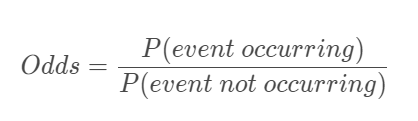

In [9]:
Image('firstPNG.png')

The odds tell us how many more times likely an event is to occur than not occur. If a student will pass the exam with probability 0.7, they will fail with probability 1 - 0.7 = 0.3. We can then calculate the odds of passing as:

* **odds of passing = 0.7 / 0.3 = 2.33**

The log-odds are then understood as the logarithm of the odds!

* **Log odds of passing = log(2.33) = 0.847**

For our Logistic Regression model, however, we calculate the log-odds, represented by z below, by summing the product of each feature value by its respective coefficient and adding the intercept. This allows us to map our feature values to a measure of how likely it is that a data sample belongs to the positive class.

* **Z = b0 + bixi + ... + bnxn**


* b_0 is the intercept
* b_1, b_2, … b_n are the coefficients of the features x_1, x_2, … x_n

This kind of multiplication and summing is known as a dot product.


We can perform a dot product using numpy‘s np.dot() method! Given feature matrix features, coefficient vector coefficients, and an intercept, we can calculate the log-odds in numpy as follows:


**log_odds = np.dot(features, coefficients) + intercept**

np.dot() will take each row, or student, in features and multiply each individual feature value by its respective coefficient in coefficients, summing the result, as shown below.



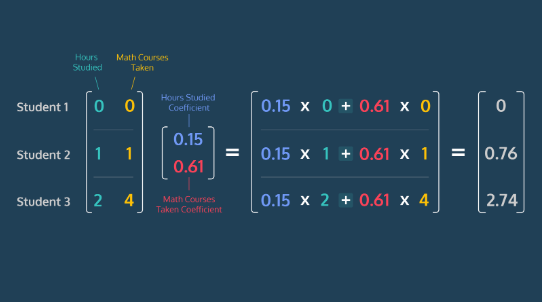

In [12]:
Image('two.png')

We then add in the intercept to get the log-odds!

### Ques 1
Let’s create a function log_odds that takes features, coefficients and intercept as parameters. For now return features.

In [13]:
def log_odds(features, coefficients, intercept):
    return features

### Ques 2
Update log_odds to return the dot product of features and coefficients.

In [14]:
def log_odds(features, coefficients, intercept):
    return np.dot(features, coefficients)

### Ques 3 
Update the return statement of log-odds by adding the intercept after the dot product.

In [15]:
def log_odds(features, coefficients, intercept):
    return np.dot(features, coefficients) + intercept

### Ques 4
With the log_odds function you created, let’s calculate the log-odds of passing for the Introductory Machine Learning students. Use hours_studied as the features, calculated_coefficients as the coefficients and intercept as the intercept. Store the result in calculated_log_odds, and print it out.

In [16]:
calculated_log_odds = log_odds(hours_studied, calculated_coefficients, intercept)

print(calculated_log_odds)

[[-1.76125712]
 [-1.55447221]
 [-1.3476873 ]
 [-1.14090239]
 [-0.93411748]
 [-0.72733257]
 [-0.52054766]
 [-0.31376275]
 [-0.10697784]
 [ 0.09980707]
 [ 0.30659198]
 [ 0.51337689]
 [ 0.7201618 ]
 [ 0.92694671]
 [ 1.13373162]
 [ 1.34051653]
 [ 1.54730144]
 [ 1.75408635]
 [ 1.96087126]
 [ 2.16765617]]


## Sigmoid Function

**How did our Logistic Regression model create the S-shaped curve we previously saw? The answer is the Sigmoid Function.**



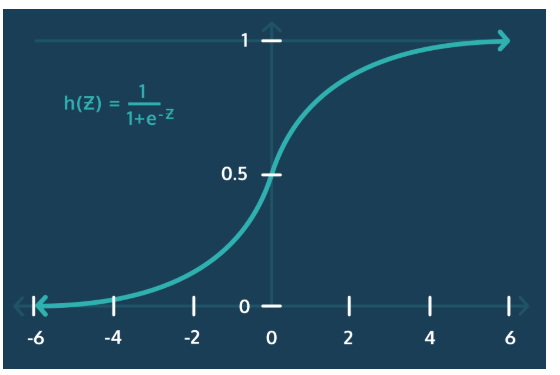

In [18]:
Image('three.png')

The Sigmoid Function is a special case of the more general Logistic Function, where Logistic Regression gets its name. Why is the Sigmoid Function so important? By plugging the log-odds into the Sigmoid Function, defined below, we map the log-odds z to the range [0,1].



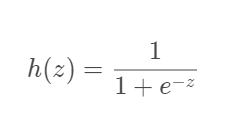

In [19]:
Image('four.png')

* e^(-z) is the exponential function, which can be written in numpy as np.exp(-z)

This enables our Logistic Regression model to output the probability of a sample belonging to the positive class, or in our case, a student passing the final exam!

### Ques 
Let us create our own sigmoid function?

In [20]:
# Create your sigmoid function here
def sigmoid(z):
  denominator = 1 + np.exp(-z)
  return 1 / denominator

# Calculate the sigmoid of the log-odds here
probabilities = sigmoid(calculated_log_odds)

print(probabilities)

[[0.14663296]
 [0.17444128]
 [0.20624873]
 [0.24215472]
 [0.28209011]
 [0.32578035]
 [0.37272418]
 [0.42219656]
 [0.47328102]
 [0.52493108]
 [0.57605318]
 [0.62559776]
 [0.67264265]
 [0.71645543]
 [0.7565269 ]
 [0.79257487]
 [0.82452363]
 [0.85246747]
 [0.87662721]
 [0.89730719]]


## Log loss 1

Now that we understand how a Logistic Regression model makes its probability predictions, what coefficients and intercept should we use in our model to best predict whether a student will pass the exam? To answer this question we need a way to evaluate how well a given model fits the data we have.

The function used to evaluate the performance of a machine learning model is called a loss function, or a cost function. To evaluate how “good a fit” a model is, we calculate the loss for each data sample (how wrong the model’s prediction was) and then average the loss across all samples. The loss function for Logistic Regression, known as **Log Loss**, is given below:

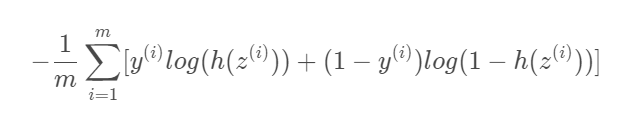

In [21]:
Image('five.png')

* m is the total number of data samples
* y_i is the class of data sample i
* z_i is the log-odds of sample i
* h(z_i) is the sigmoid of the log-odds of sample i, which is the probability of sample i belonging to the positive class

The log-loss function might seem scary, but don’t worry, we are going to break it down in the next exercise!

The goal of our Logistic Regression model is to find the feature coefficients and intercept, which shape the logistic function, that minimize log-loss for our training data!

### Log loss 2:

Let’s go ahead and break down our log-loss function into two separate parts so it begins to make more sense. Consider the case when a data sample has class y = 1, or for our data when a student passed the exam. The right-side of the equation drops out because we end up with 1 - 1 (or 0) multiplied by some value. The loss for that individual student becomes:


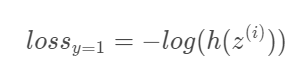

In [30]:
Image('twenty.png')

The loss for a student who passed the exam is just the log of the probability the student passed the exam!

And for a student who fails the exam, where a sample has class y = 0, the left-side of the equation drops out and the loss for that student becomes:

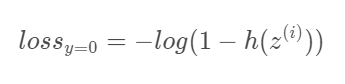

In [31]:
Image('qqq.png')

The loss for a student who passed the exam is just the log of the probability the student passed the exam!

And for a student who fails the exam, where a sample has class y = 0, the left-side of the equation drops out and the loss for that student becomes:

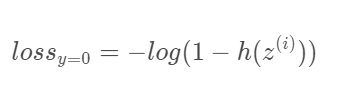

In [33]:
Image('ninenty.png')

The loss for a student who failed the exam is the log of one minus the probability the student passed the exam, which is just the log of the probability the student failed the exam!

Let’s take a closer look at what is going on with our loss function by graphing the loss of individual samples when the class label is y = 1 and y = 0.

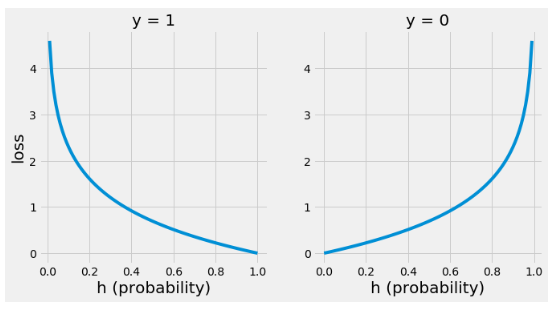

In [34]:
Image('iii.png')

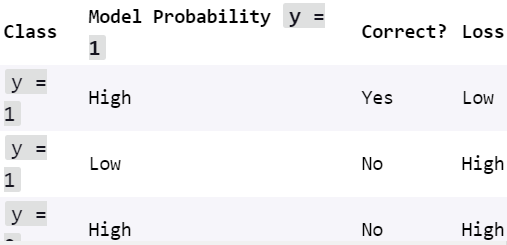

In [35]:
Image('dron.png')

From the graphs and the table you can see that confident correct predictions result in small losses, while confident incorrect predictions result in large losses that approach infinity. This makes sense! We want to punish our model with an increasing loss as it makes progressively incorrect predictions, and we want to reward the model with a small loss as it makes correct predictions.

Just like in Linear Regression, we can then use gradient descent to find the coefficients that minimize log-loss across all of our training data.

## Ques 1
Let’s calculate the log-loss for our Codecademy University data. To calculate loss we need the actual classes, pass (1), or fail (0), for the students. Print passed_exam to inspect the actual classes.

In [36]:
# Function to calculate log-loss
def log_loss(probabilities,actual_class):
    return np.sum(-(1/actual_class.shape[0])*(actual_class*np.log(probabilities) + (1-actual_class)*np.log(1-probabilities)))

# Print passed_exam here
print(passed_exam)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


### Ques 2
In the code editor, we’ve provided you with a function log_loss() that calculates the log-loss for a set of predicted probabilities and their actual classes. Use probabilities, which you calculated previously, and passed_exam as inputs to log_loss() and store the result in loss_1. Print loss_1.

In [37]:
# Calculate and print loss_1 here
loss_1 = log_loss(probabilities,passed_exam )
print(loss_1)

0.398640332141742


### Ques 3
Now that we have calculated the loss for our best coefficients, let’s compare this loss to the loss we begin with when we initialize our coefficients and intercept to 0. probabilities_2 contains the calculated probabilities of the students passing the exam with the coefficient for hours_studied set to 0. Use probabilities_2 and passed_exam as inputs to log_loss() and store the result in loss_2. Print loss_2.

Which set of coefficients produced the lower log-loss?

In [39]:
# Calculate and print loss_2 here
loss_2 = log_loss(probabilities_2, passed_exam)
print(loss_2)

13.862943611198906


**The first set of coefficients produced a lower log-loss than the second set! This is because the first set of coefficients was determined by the Logistic Regression model as the optimized coefficient values. The second set of coefficients were initialized at 0, and served as a starting point.**

In [40]:
hours_studied

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

In [41]:
probabilities_2

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

## Classification Thresholding

Many machine learning algorithms, including Logistic Regression, spit out a classification probability as their result. Once we have this probability, we need to make a decision on what class the sample belongs to. This is where the **classification threshold** comes in!

The default threshold for many algorithms is 0.5. If the predicted probability of an observation belonging to the positive class is greater than or equal to the threshold, 0.5, the classification of the sample is the positive class. If the predicted probability of an observation belonging to the positive class is less than the threshold, 0.5, the classification of the sample is the negative class.



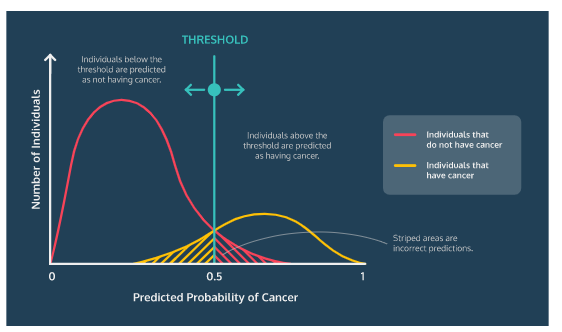

In [42]:
Image('rose.png')

We can choose to change the threshold of classification based on the use-case of our model. For example, if we are creating a Logistic Regression model that classifies whether or not an individual has cancer, we want to be more sensitive to the positive cases, signifying the presence of cancer, than the negative cases.

In order to ensure that most patients with cancer are identified, we can move the classification threshold down to 0.3 or 0.4, increasing the sensitivity of our model to predicting a positive cancer classification. While this might result in more overall misclassifications, we are now missing fewer of the cases we are trying to detect: actual cancer patients.

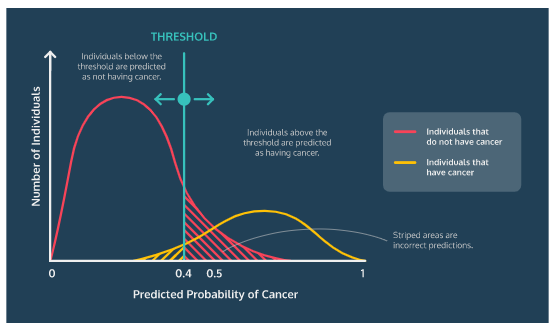

In [43]:
Image('great.png')

## Data we have:

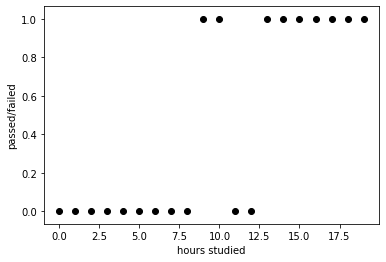

In [50]:
#Scatter plot of exam passage vs number of hours studied
plt.scatter(hours_studied.ravel(), passed_exam, color='black', zorder=20)
plt.ylabel('passed/failed')
plt.xlabel('hours studied')

plt.show()

## Ques 1
Let’s use all the knowledge we’ve gathered to create a function that performs thresholding and makes class predictions! Define a function predict_class() that takes a features matrix, a coefficients vector, an intercept, and a threshold as parameters. Return threshold.

In [44]:
def predict_class(features,coefficients,intercept,threshold):
    return threshold

### Ques 2
In predict_class(), calculate the log-odds using the log_odds() function we defined earlier. Store the result in calculated_log_odds, and return calculated_log_odds.

In [45]:
def predict_class(features,coefficients,intercept,threshold):
    calculated_log_odds = log_odds(features,coefficients,intercept)
    return calculated_log_odds

### Ques 3
Still in predict_class(), find the probabilities that the samples belong to the positive class. Create a variable probabilities, and give it the value returned by calling sigmoid() on calculated_log_odds. Return probabilities.

In [46]:
def predict_class(features,coefficients,intercept,threshold):
    calculated_log_odds = log_odds(features,coefficients,intercept)
    probabilities = sigmoid(calculated_log_odds)
    return probabilities 

### Ques 4
Return 1 for all values within probabilities equal to or above threshold, and 0 for all values below threshold.

In [48]:
def predict_class(features,coefficients,intercept,threshold):
    calculated_log_odds = log_odds(features,coefficients,intercept)
    probabilities = sigmoid(calculated_log_odds)
    return  np.where(probabilities >= threshold, 1, 0)

### Ques 5
Let’s make final classifications on our Codecademy University data to see which students passed the exam. Use the predict_class() function with hours_studied, calculated_coefficients, intercept, and a threshold of 0.5 as parameters. Store the results in final_results, and print final_results.

In [49]:
# Make final classifications on Codecademy University data here

final_results = predict_class(hours_studied, calculated_coefficients, intercept, 0.5)
print(final_results)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
